In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\REALME\Desktop\My Projects\summer olympics.csv")

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# Deal with the null, noise, and duplicate values in the dataset. Do not drop the null values instead fill it up with the appropriate values. Also, find the 5-point summary of all the numerical columns.

In [5]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [10]:
df.fillna(method='ffill', inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

In [17]:
df.describe()

,Year
count,31163.000000
mean,1970.481148
std,33.158602
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [18]:
# Standardize all column headers to lowercase. (”Year” will become ‘year’ and so on) . Don’t do it manually for all the columns.
df.columns = df.columns.str.lower()

In [19]:
# Find the unique values in all the columns at once.
df.nunique()

year             27
city             22
sport            43
discipline       67
athlete       22762
country         147
gender            2
event           666
medal             3
dtype: int64

Do the analysis to represent the top 10 countries that won the most medals in the Summer Olympics. Visualize it with the help of a chart.

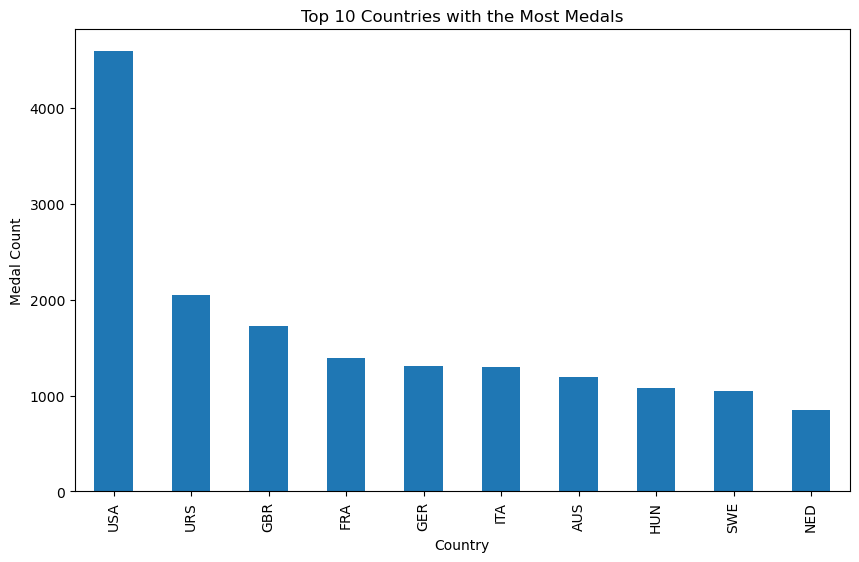

In [21]:
top_10_countries = df[df['medal'].notnull()].groupby('country')['medal'].count().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Top 10 Countries with the Most Medals')
plt.show()

In [22]:
df['weighted_medal'] = df['medal'].map({'Gold': 0.5, 'Silver': 0.35, 'Bronze': 0.15})
event_with_most_weighted_medals = df.groupby('event')['weighted_medal'].sum().idxmax()

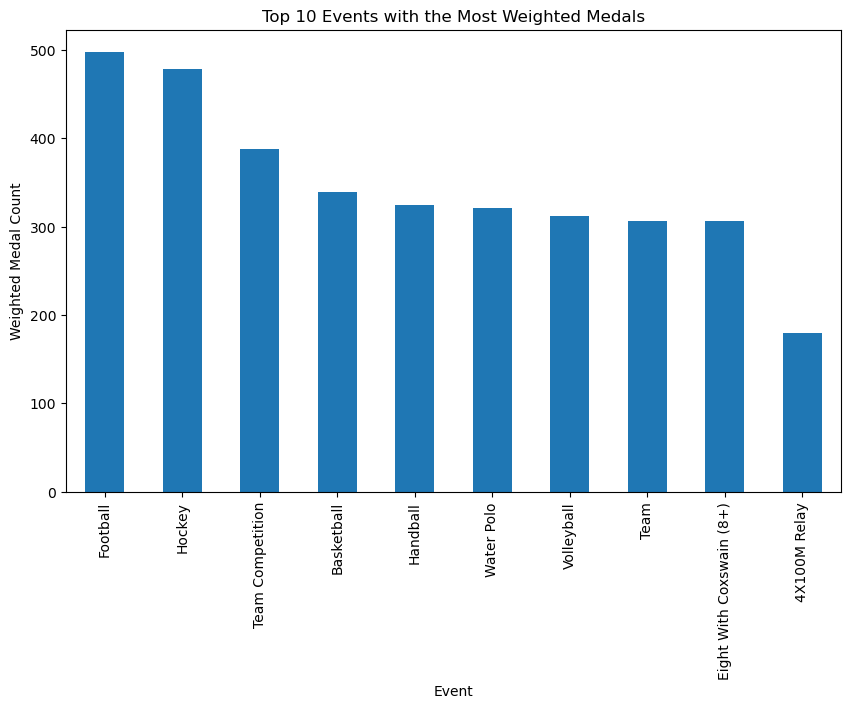

In [28]:
plt.figure(figsize=(10, 6))
df.groupby('event')['weighted_medal'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Weighted Medal Count')
plt.title('Top 10 Events with the Most Weighted Medals')
plt.show()

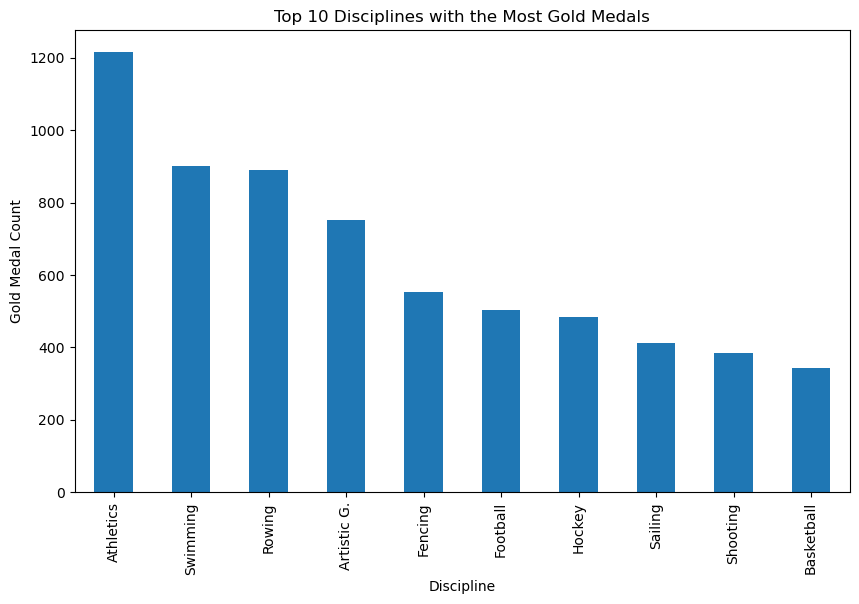

In [29]:
top_10_disciplines = df[df['medal'] == 'Gold'].groupby('discipline')['medal'].count().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_disciplines.plot(kind='bar')
plt.xlabel('Discipline')
plt.ylabel('Gold Medal Count')
plt.title('Top 10 Disciplines with the Most Gold Medals')
plt.show()

In [32]:
first_participation_year = df.groupby('sport')['year'].min()
pd.DataFrame({'Sport': first_participation_year.index, 'Year of First Participation': first_participation_year.values})

,Sport,Year of First Participation
0,Aquatics,1896
1,Archery,1900
2,Athletics,1896
3,Badminton,1992
4,Baseball,1992
5,Basketball,1936
6,Basque Pelota,1900
7,Boxing,1904
8,Canoe,2012
9,Canoe / Kayak,1936


In [33]:
df['sport'].nunique()

43

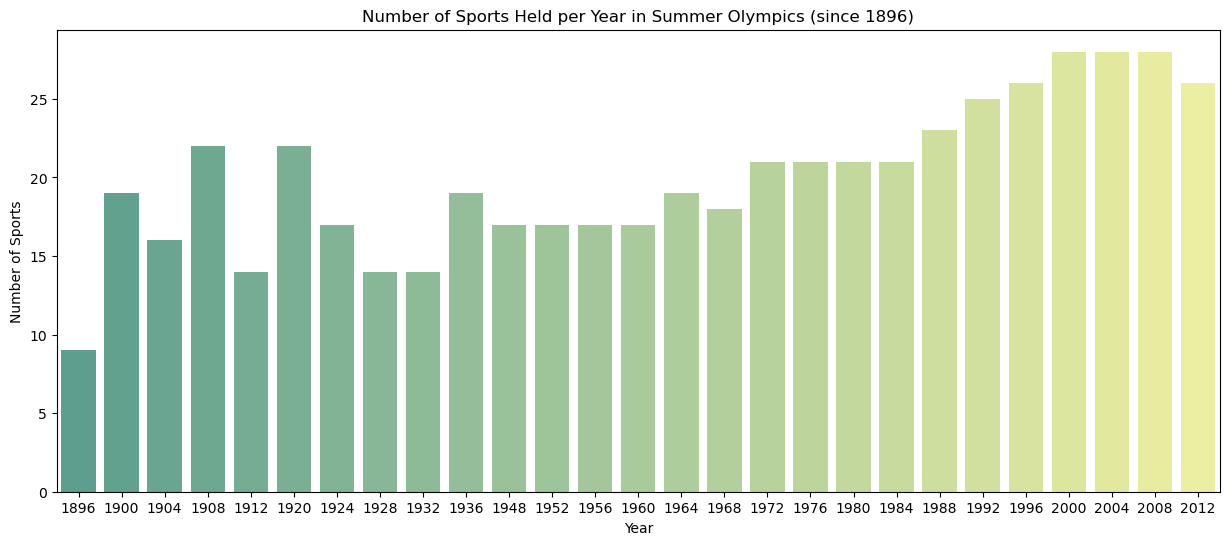

In [49]:
sports_per_year = df.groupby('year')['sport'].nunique()
plt.figure(figsize=(15, 6))
sns.barplot(x=sports_per_year.index, y=sports_per_year.values, palette='summer', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Sports')
plt.title('Number of Sports Held per Year in Summer Olympics (since 1896)')
plt.show()

<Figure size 1500x600 with 0 Axes>

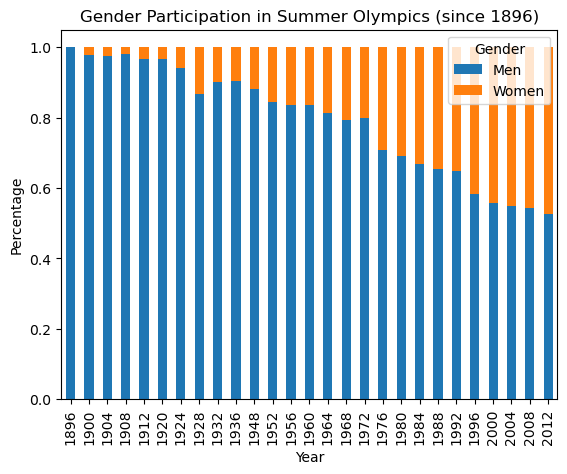

In [48]:
gender_participation = df.groupby('year')['gender'].value_counts(normalize=True).unstack()
plt.figure(figsize=(15, 6))
gender_participation.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Gender Participation in Summer Olympics (since 1896)')
plt.legend(title='Gender')
plt.show()

In [51]:
df['city'].nunique()

22

In [52]:
# How many cities in which the Olympics was conducted more than once?
df['city'].value_counts()[df['city'].value_counts() > 1].count()

22

In [53]:
# Which country won the most Gold medals, in each of the Olympics?
df[df['medal'] == 'Gold'].groupby('year')['country'].agg(lambda x: x.value_counts().idxmax())

year
1896    GER
1900    GBR
1904    USA
1908    GBR
1912    SWE
1920    USA
1924    USA
1928    USA
1932    USA
1936    GER
1948    USA
1952    USA
1956    URS
1960    USA
1964    USA
1968    USA
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
1992    EUN
1996    USA
2000    USA
2004    USA
2008    USA
2012    USA
Name: country, dtype: object

In [54]:
# How many medals were won by women in Summer Olympics each year?
df[df['gender'] == 'Women'].groupby('year')['medal'].count()

year
1900     11
1904     12
1908     15
1912     30
1920     43
1924     51
1928     95
1932     60
1936     84
1948     96
1952    139
1956    146
1960    145
1964    190
1968    212
1972    238
1976    381
1980    429
1984    486
1988    535
1992    600
1996    777
2000    889
2004    899
2008    932
2012    923
Name: medal, dtype: int64

In [55]:
# Top 5 countries to win most Gold medals across all seasons collectively.
df[df['medal'] == 'Gold'].groupby('country')['medal'].count().nlargest(5)

country
USA    2235
URS     838
GBR     546
ITA     476
GER     452
Name: medal, dtype: int64

2012


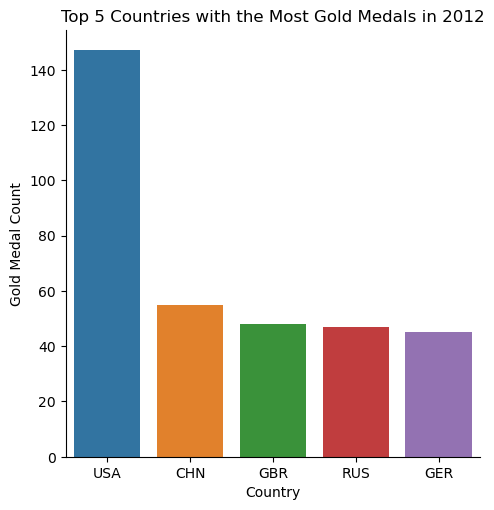

In [62]:
def top_5_countries_by_year(year):
    top_5_countries = df[(df['medal'] == 'Gold') & (df['year'] == year)].groupby('country')['medal'].count().nlargest(5)
    return top_5_countries

year = int(input())
top_5_countries = top_5_countries_by_year(year)

if not top_5_countries.empty:
    sns.catplot(x='country', y='medal', data=top_5_countries.reset_index(), kind='bar')
    plt.xlabel('Country')
    plt.ylabel('Gold Medal Count')
    plt.title(f'Top 5 Countries with the Most Gold Medals in {year}')
    plt.show()
else:
    print(f"No gold medals awarded in {year}.")


In [63]:
# Create a data frame to show the Disciplines with the greatest number of Gold Medals
df[df['medal'] == 'Gold'].groupby('discipline')['medal'].count().nlargest()

discipline
Athletics      1215
Swimming        901
Rowing          890
Artistic G.     752
Fencing         552
Name: medal, dtype: int64

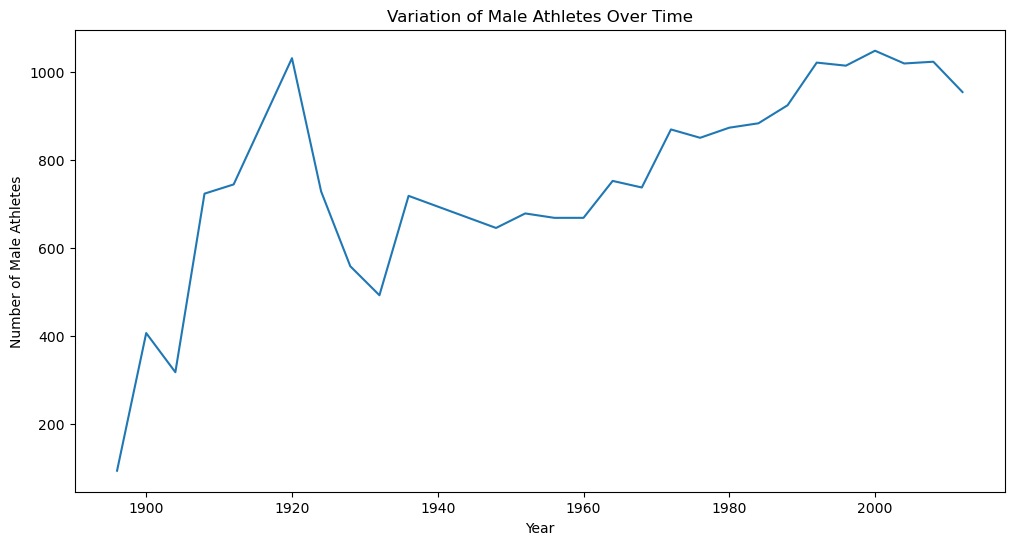

In [64]:
male_athletes_over_time = df[df['gender'] == 'Men'].groupby('year')['athlete'].nunique()
plt.figure(figsize=(12, 6))
male_athletes_over_time.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Male Athletes')
plt.title('Variation of Male Athletes Over Time')
plt.show()

<Figure size 1500x600 with 0 Axes>

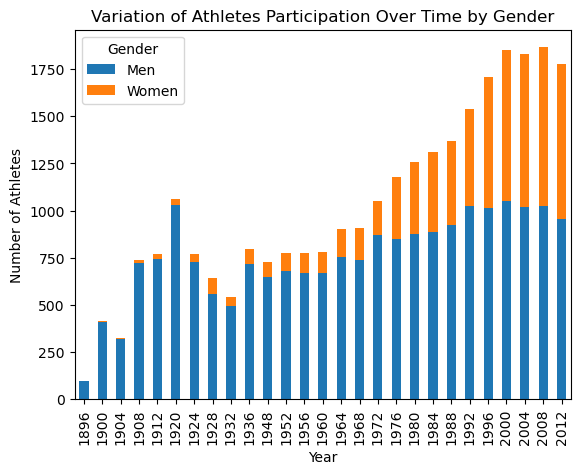

In [73]:
participation_over_time = df.groupby(['year', 'gender'])['athlete'].nunique().unstack()
plt.figure(figsize=(15, 6))
participation_over_time.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Variation of Athletes Participation Over Time by Gender')
plt.legend(title='Gender')
plt.show()

C:\Users\REALME\AppData\Local\Temp\ipykernel_496\1342611618.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


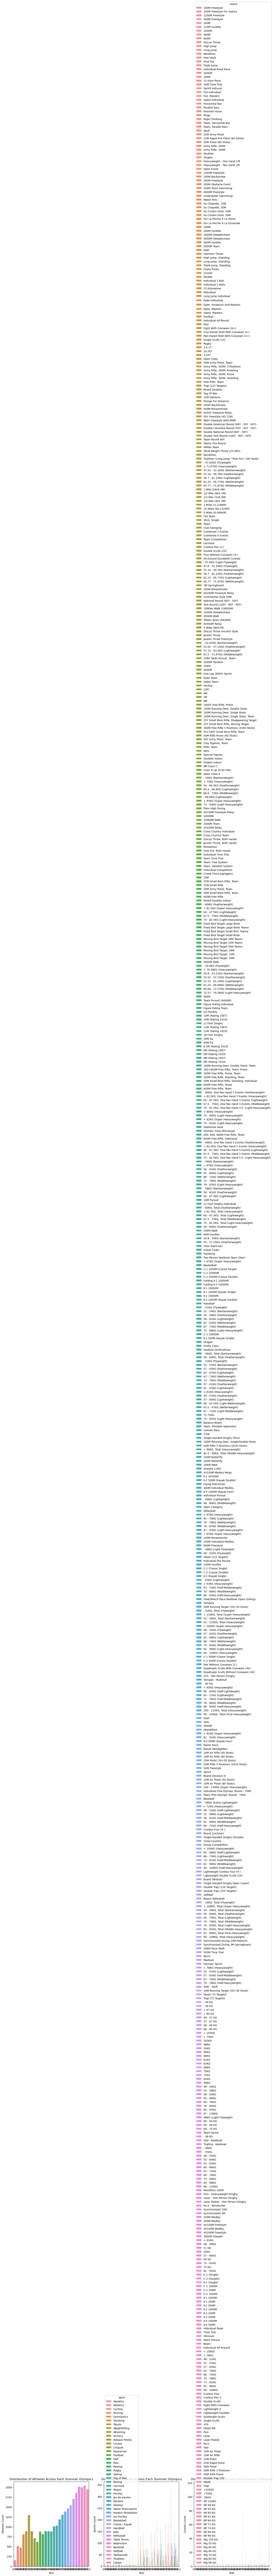

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(x='year', data=df, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Athletes Count')
axes[0].set_title('Distribution of Athletes Across Each Summer Olympics')

sns.countplot(x='year', hue='sport', data=df, ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sports Count')
axes[1].set_title('Distribution of Sports Across Each Summer Olympics')

sns.countplot(x='year', hue='event', data=df, ax=axes[2])
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Events Count')
axes[2].set_title('Distribution of Events Across Each Summer Olympics')

plt.tight_layout()
plt.show()